# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
       

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City '" + city.title() +" 'not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grindavik
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | darhan
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | birin
Processing Record 8 of Set 1 | jalu
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | zhigansk
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | ambon
Processing Record 18 of Set 1 | ariquemes
Processing Record 19 of Set 1 | deputatskiy
Processing Record 20 of Set 1 | vardo
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | tiksi
Processing Record 23 of Set 1 | illoqqorto

City 'Nizhneyansk 'not found. Skipping...
Processing Record 38 of Set 4 | miyako
Processing Record 39 of Set 4 | irbit
Processing Record 40 of Set 4 | dicabisagan
Processing Record 41 of Set 4 | severo-kurilsk
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | esmeraldas
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | klaksvik
Processing Record 46 of Set 4 | cairns
Processing Record 47 of Set 4 | vao
Processing Record 48 of Set 4 | kawalu
Processing Record 49 of Set 4 | tautira
Processing Record 0 of Set 5 | katherine
Processing Record 1 of Set 5 | faanui
Processing Record 2 of Set 5 | khatanga
Processing Record 3 of Set 5 | ponta do sol
Processing Record 4 of Set 5 | genthin
Processing Record 5 of Set 5 | coquimbo
Processing Record 6 of Set 5 | rohri
Processing Record 7 of Set 5 | souillac
Processing Record 8 of Set 5 | mergui
City 'Mergui 'not found. Skipping...
Processing Record 9 of Set 5 | boende
Processing Record 10 of Set 5 | saint

Processing Record 21 of Set 8 | tabarqah
City 'Tabarqah 'not found. Skipping...
Processing Record 22 of Set 8 | kalmunai
Processing Record 23 of Set 8 | fuling
Processing Record 24 of Set 8 | aripuana
Processing Record 25 of Set 8 | peruibe
Processing Record 26 of Set 8 | mersing
Processing Record 27 of Set 8 | porto novo
Processing Record 28 of Set 8 | kumi
Processing Record 29 of Set 8 | rongcheng
Processing Record 30 of Set 8 | lac du bonnet
Processing Record 31 of Set 8 | medina del campo
Processing Record 32 of Set 8 | rosenberg
Processing Record 33 of Set 8 | san quintin
Processing Record 34 of Set 8 | presidencia roque saenz pena
Processing Record 35 of Set 8 | aksarka
Processing Record 36 of Set 8 | strezhevoy
Processing Record 37 of Set 8 | valley city
Processing Record 38 of Set 8 | korla
Processing Record 39 of Set 8 | samandag
Processing Record 40 of Set 8 | kindu
Processing Record 41 of Set 8 | mount isa
Processing Record 42 of Set 8 | jumla
Processing Record 43 of Set 8 |

Processing Record 4 of Set 12 | lagoa
Processing Record 5 of Set 12 | guerrero negro
Processing Record 6 of Set 12 | salinas
Processing Record 7 of Set 12 | rabo de peixe
Processing Record 8 of Set 12 | ostrovnoy
Processing Record 9 of Set 12 | bud
Processing Record 10 of Set 12 | sobolevo
Processing Record 11 of Set 12 | upernavik
Processing Record 12 of Set 12 | okha
Processing Record 13 of Set 12 | linxi
Processing Record 14 of Set 12 | launceston
Processing Record 15 of Set 12 | tekeli
Processing Record 16 of Set 12 | salacgriva
Processing Record 17 of Set 12 | maniitsoq
Processing Record 18 of Set 12 | daru
Processing Record 19 of Set 12 | dalton
Processing Record 20 of Set 12 | makung
City 'Makung 'not found. Skipping...
Processing Record 21 of Set 12 | mogadishu
Processing Record 22 of Set 12 | salto
Processing Record 23 of Set 12 | luanda
Processing Record 24 of Set 12 | skibbereen
Processing Record 25 of Set 12 | lithakia
Processing Record 26 of Set 12 | halalo
City 'Halalo 'n

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grindavik,63.8424,-22.4338,4.26,87,100,6.17,IS,1680469662
1,Bambous Virieux,-20.3428,57.7575,26.23,81,83,4.19,MU,1680469662
2,Darhan,49.4867,105.9228,-10.94,48,4,0.77,MN,1680469663
3,Punta Arenas,-53.1500,-70.9167,16.06,36,75,7.20,CL,1680469663
4,Albany,42.6001,-73.9662,7.12,26,11,1.79,US,1680469530


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Grindavik,63.8424,-22.4338,4.26,87,100,6.17,IS,1680469662
1,Bambous Virieux,-20.3428,57.7575,26.23,81,83,4.19,MU,1680469662
2,Darhan,49.4867,105.9228,-10.94,48,4,0.77,MN,1680469663
3,Punta Arenas,-53.1500,-70.9167,16.06,36,75,7.20,CL,1680469663
4,Albany,42.6001,-73.9662,7.12,26,11,1.79,US,1680469530


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

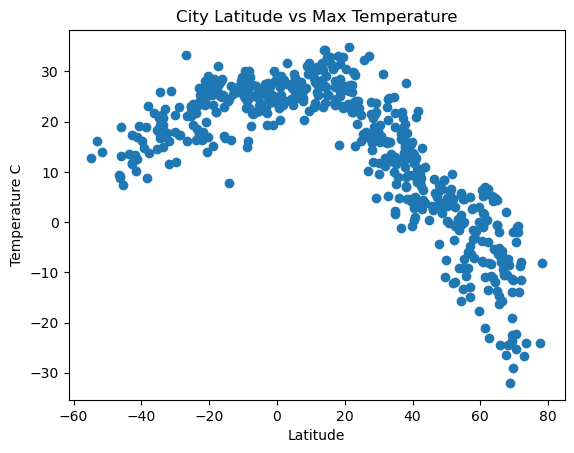

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature C")
plt.title("City Latitude vs Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

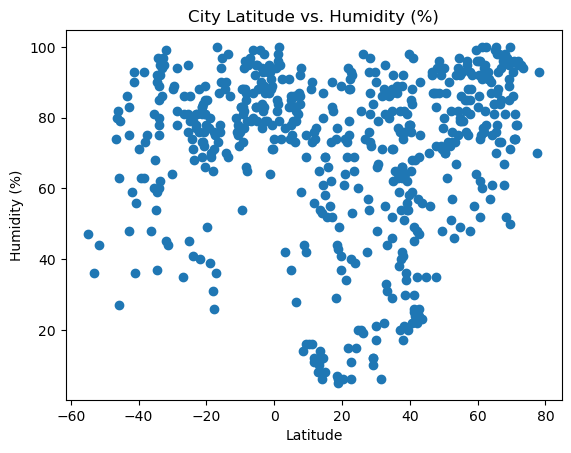

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

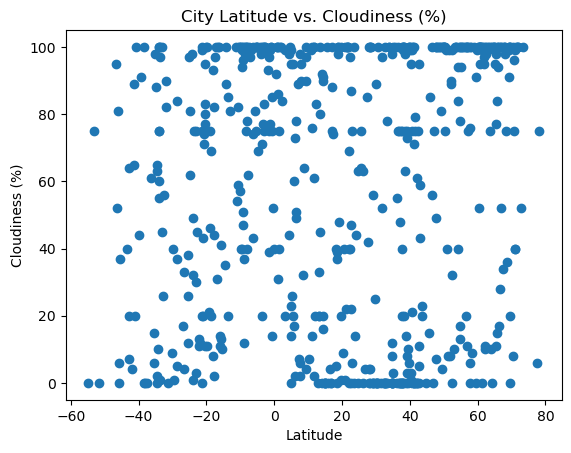

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

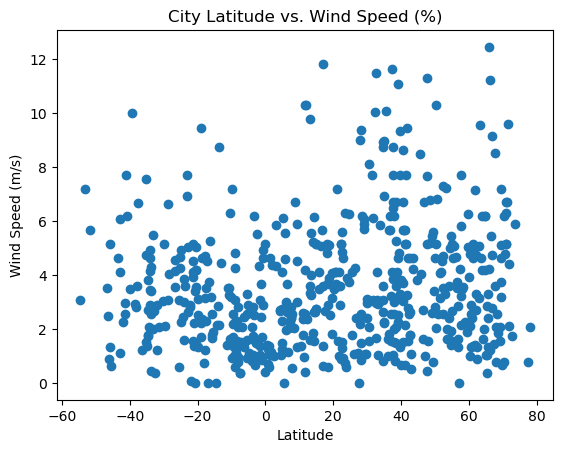

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, location):
    # Regression caluculation
    (slope, intercept, rvalue, pvalue, srderr) = linregress(x_values, y_values)
    
    # Linean Regression line calucation
    regress_values = (slope * x_values) + intercept
    line_eq = f"y = {round(slope ,2)}x +{round(intercept ,2)}"
    print(f" The rvalue is: {round(rvalue,2)}")
    
    
    # create plots
    fig, axl = plt.subplots(figsize=(8,6))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="red")
   
    # Show equation on scatter plot
   
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere - {x_label} verse {y_label} Linear Regression")
    plt.annotate(line_eq, location, color="red")

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.sample(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
376,Shahr-E Babak,30.1165,55.1186,9.64,17,0,3.10,IR,1680469799
59,Sorland,67.6670,12.6934,1.92,61,100,8.53,NO,1680469676
474,Port Hawkesbury,45.6169,-61.3485,3.28,70,15,8.49,CA,1680469848
280,Hofn,64.2539,-15.2082,4.77,75,100,1.64,IS,1680469763
136,Tara,56.8944,74.3710,-4.76,85,11,2.84,RU,1680469710
373,Acajutla,13.5928,-89.8275,30.17,54,100,3.99,SV,1680469799
127,Mayo,38.8876,-76.5119,15.10,34,0,4.12,US,1680469706
118,San Cristobal,7.7669,-72.2250,26.10,59,95,2.57,VE,1680469702
77,Butaritari,3.0707,172.7902,27.46,77,20,4.34,KI,1680469683


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
174,Te Anau,-45.4167,167.7167,7.31,79,37,0.62,NZ,1680469726
265,Banjar,-8.1900,114.9675,24.76,87,100,0.97,ID,1680469756
75,Carnarvon,-24.8667,113.6333,23.55,79,62,4.92,AU,1680469681
296,Mahebourg,-20.4081,57.7000,26.25,81,77,4.17,MU,1680469772
105,Bluff,-46.6000,168.3333,9.33,74,95,3.50,NZ,1680469695
311,Bredasdorp,-34.5322,20.0403,17.99,92,2,2.69,ZA,1680469779
315,Paramonga,-10.6667,-77.8333,26.19,75,59,3.24,PE,1680469781
308,Necochea,-38.5473,-58.7368,19.01,63,100,2.93,AR,1680469777
49,Omboue,-1.5746,9.2618,25.38,87,39,3.06,GA,1680469673


###  Temperature vs. Latitude Linear Regression Plot

 The rvalue is: -0.9


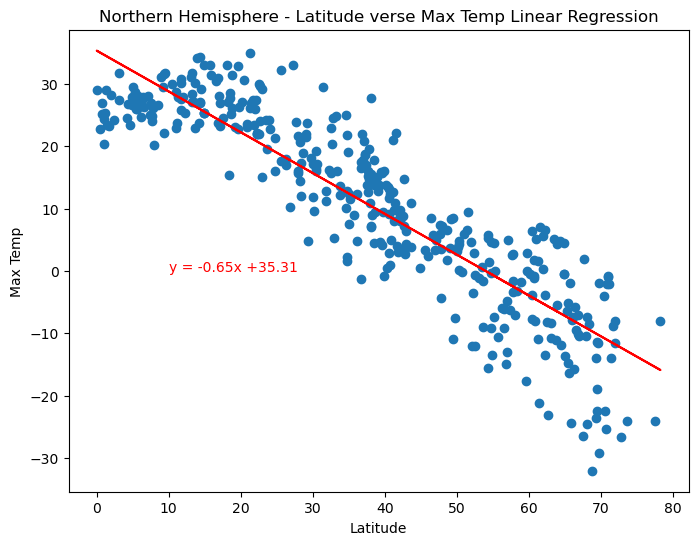

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern", (10,0))

plt.show()

 The rvalue is: 0.66


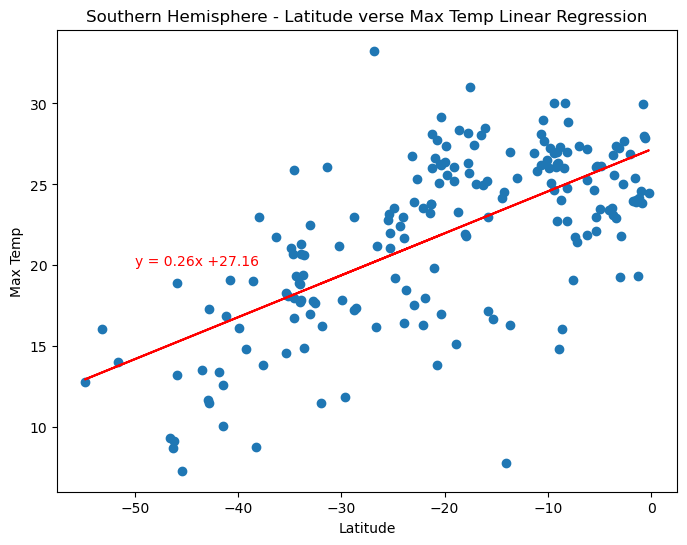

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

 The rvalue is: 0.3


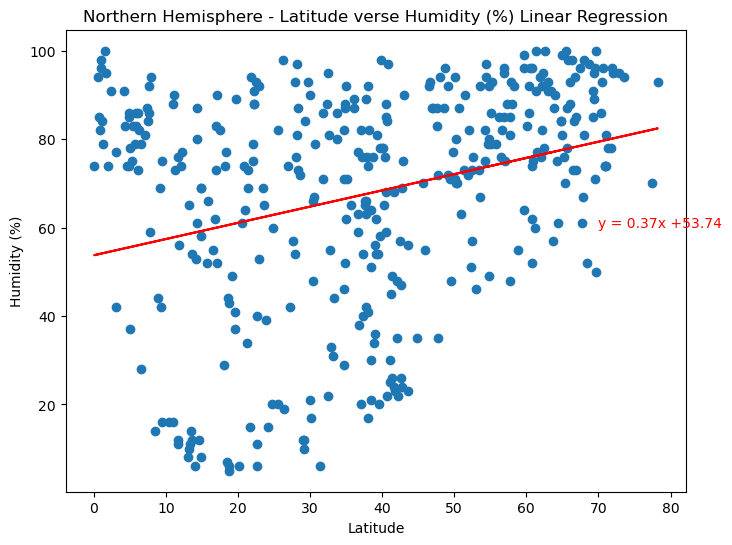

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern", (70, 60))
plt.show()

 The rvalue is: 0.37


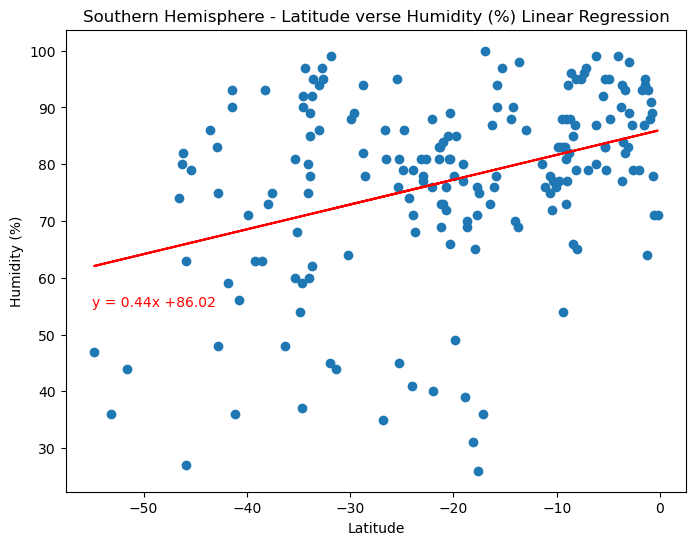

In [50]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern", (-55, 55))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

 The rvalue is: 0.2


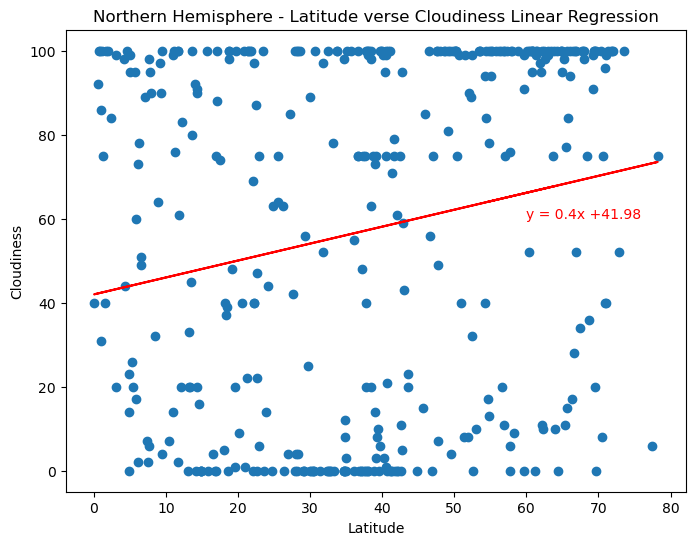

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern", (60, 60))
plt.show()

 The rvalue is: 0.39


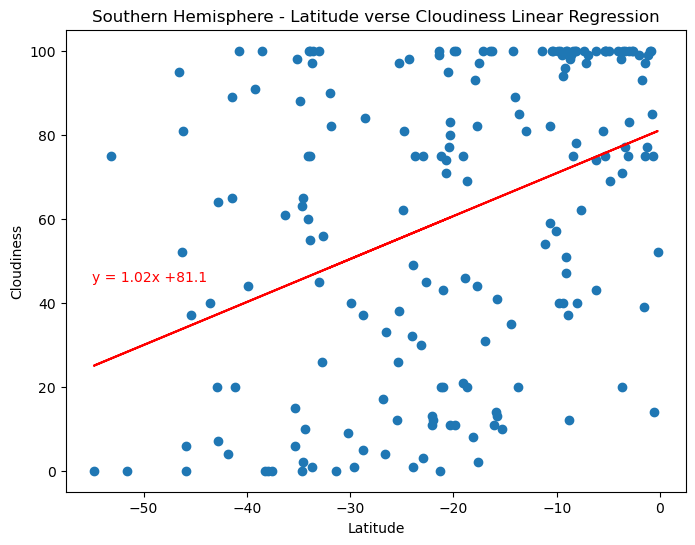

In [53]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Southern", (-55, 45))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

 The rvalue is: 0.11


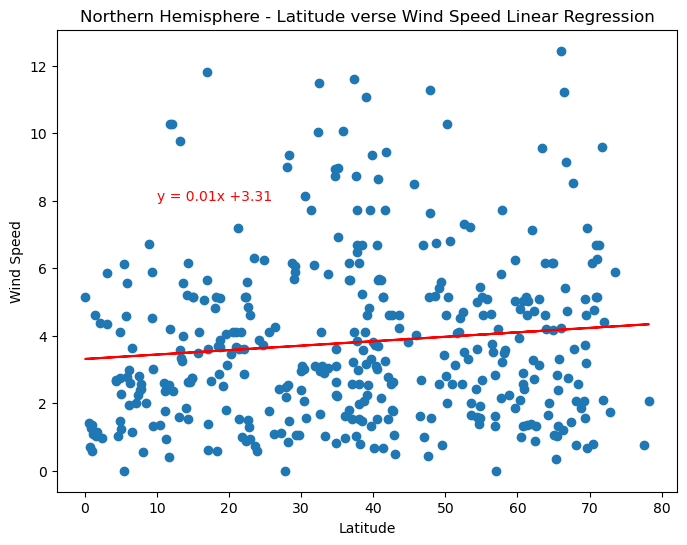

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Northern", (10, 8))
plt.show()

 The rvalue is: -0.28


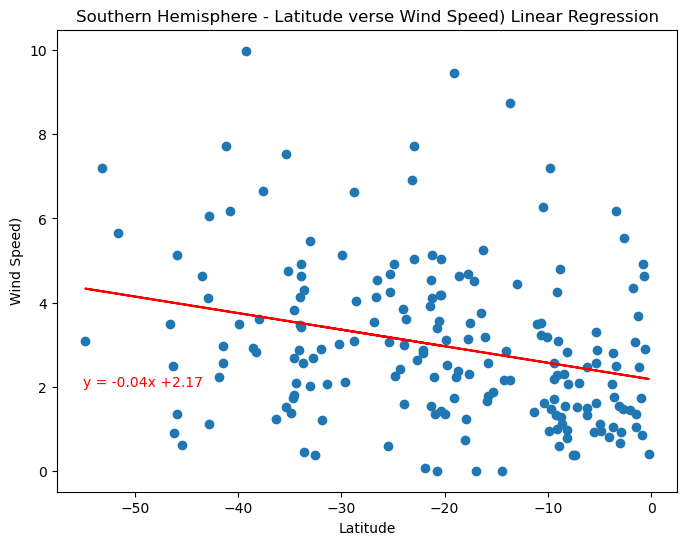

In [56]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed)", "Southern", (-55, 2))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE